In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import warnings 
warnings.filterwarnings("ignore")

In [6]:
data=pd.read_csv(r"C:\Users\shashank agarwal\Downloads\census_income.csv")

In [7]:
# In the given dataset we are suppose to predict the income of a person weather it is above 50K or not ,based on the various features such as Fnlwgt,Education,sex,age ,etc.

In [8]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [9]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
print(data["Race"].value_counts())
print(data["Sex"].value_counts())
print(data["Native_country"].value_counts())

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64
 Male      21789
 Female    10771
Name: Sex, dtype: int64
 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                       

In [11]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder 
data_frame=["Workclass","Education","Marital_status","Occupation","Relationship","Race","Sex","Native_country"]

In [13]:
data[data_frame]=data[data_frame].apply(LabelEncoder().fit_transform) 

In [14]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,<=50K


In [15]:
data["Income"].value_counts()


 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [16]:
df1=LabelEncoder().fit_transform(data["Income"])
data["Income"]=df1

In [17]:
data.head(11)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
6,52,6,209642,11,9,2,4,0,4,1,0,0,45,39,1
7,31,4,45781,12,14,4,10,1,4,0,14084,0,50,39,1
8,42,4,159449,9,13,2,4,0,4,1,5178,0,40,39,1
9,37,4,280464,15,10,2,4,0,2,1,0,0,80,39,1


In [18]:
#Since the data is highly imbalanced , so we need to do balancing for , unbiased learning of the data 

In [19]:
x=data.drop("Income",axis=1)
y=data.Income
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)  

In [20]:
18545+5875

24420

In [21]:
(24420/32560)*100 #cross validating taht 75 percent data has been picked and used for predicting the results  

75.0

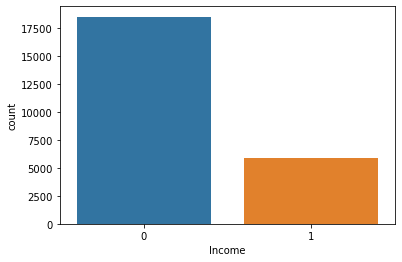

In [24]:
sns.countplot(y_train)

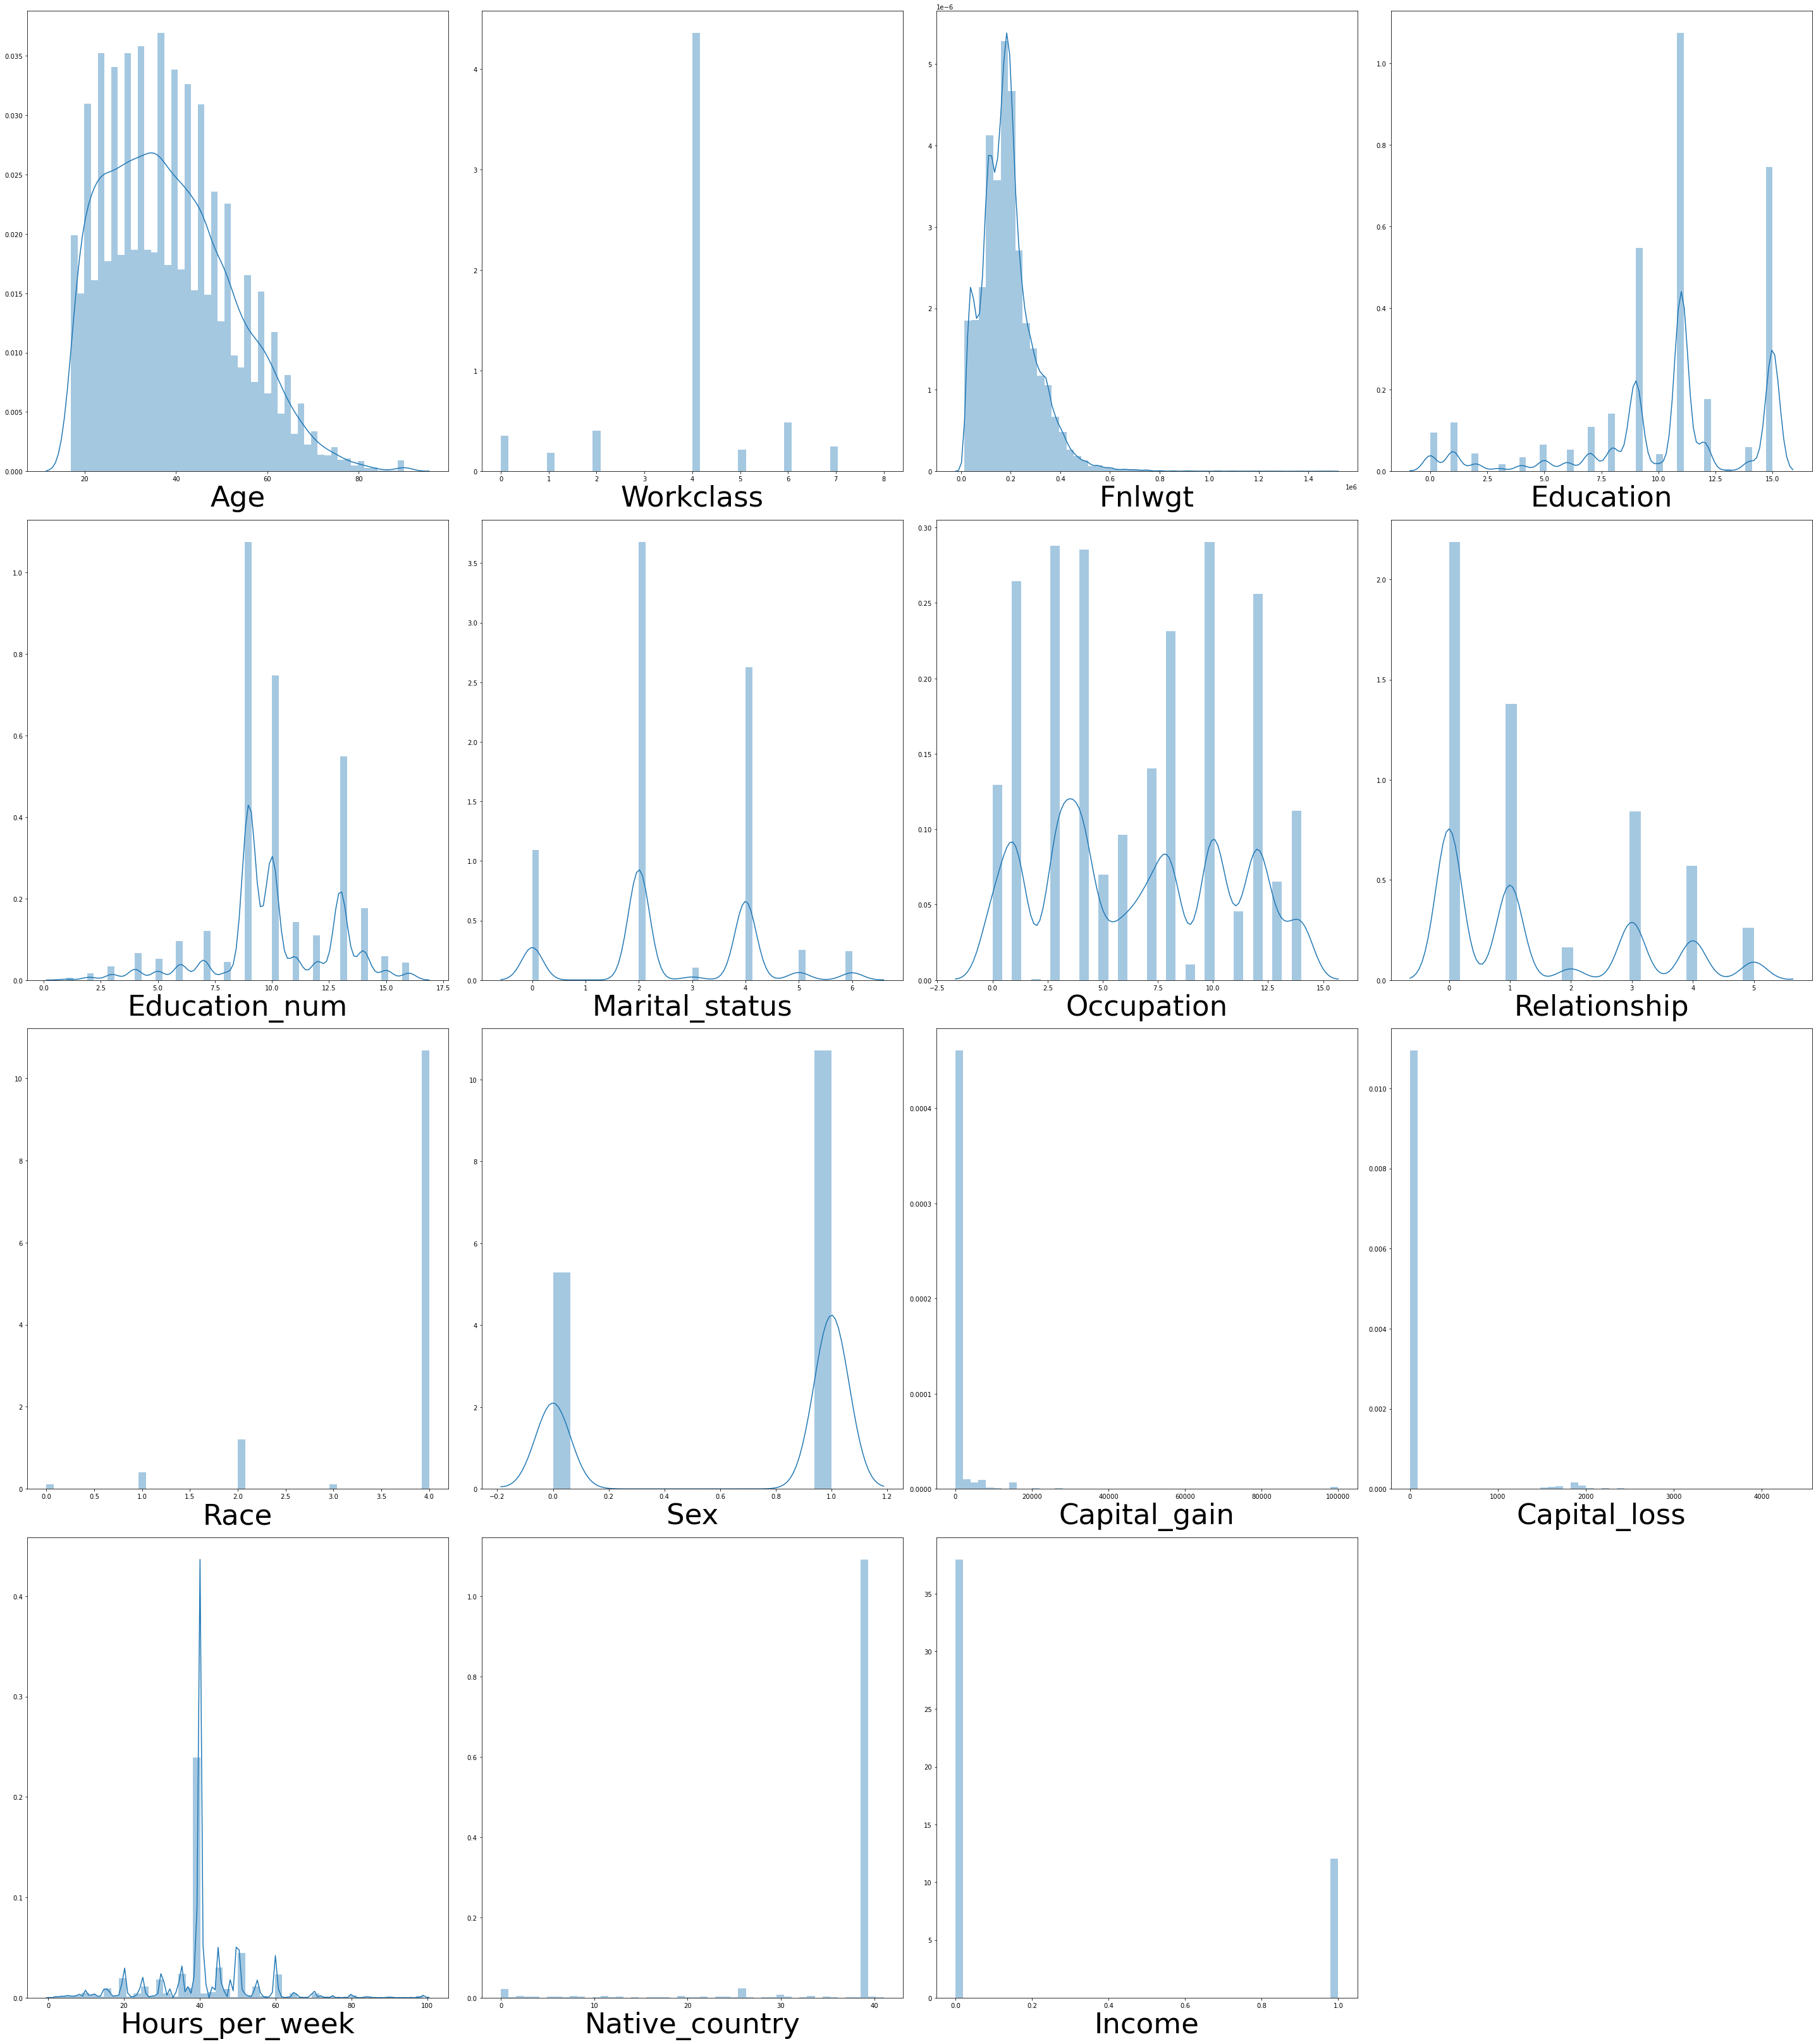

In [25]:
plt.figure(figsize=(40,45))
plotnumber=1
for column in data:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=45)
        plt.xlabel(column,fontsize=45)
    plotnumber+=1
plt.tight_layout()

In [26]:
data["Fnlwgt"]=np.log(data["Fnlwgt"])
data["Age"]=np.log(data["Age"])

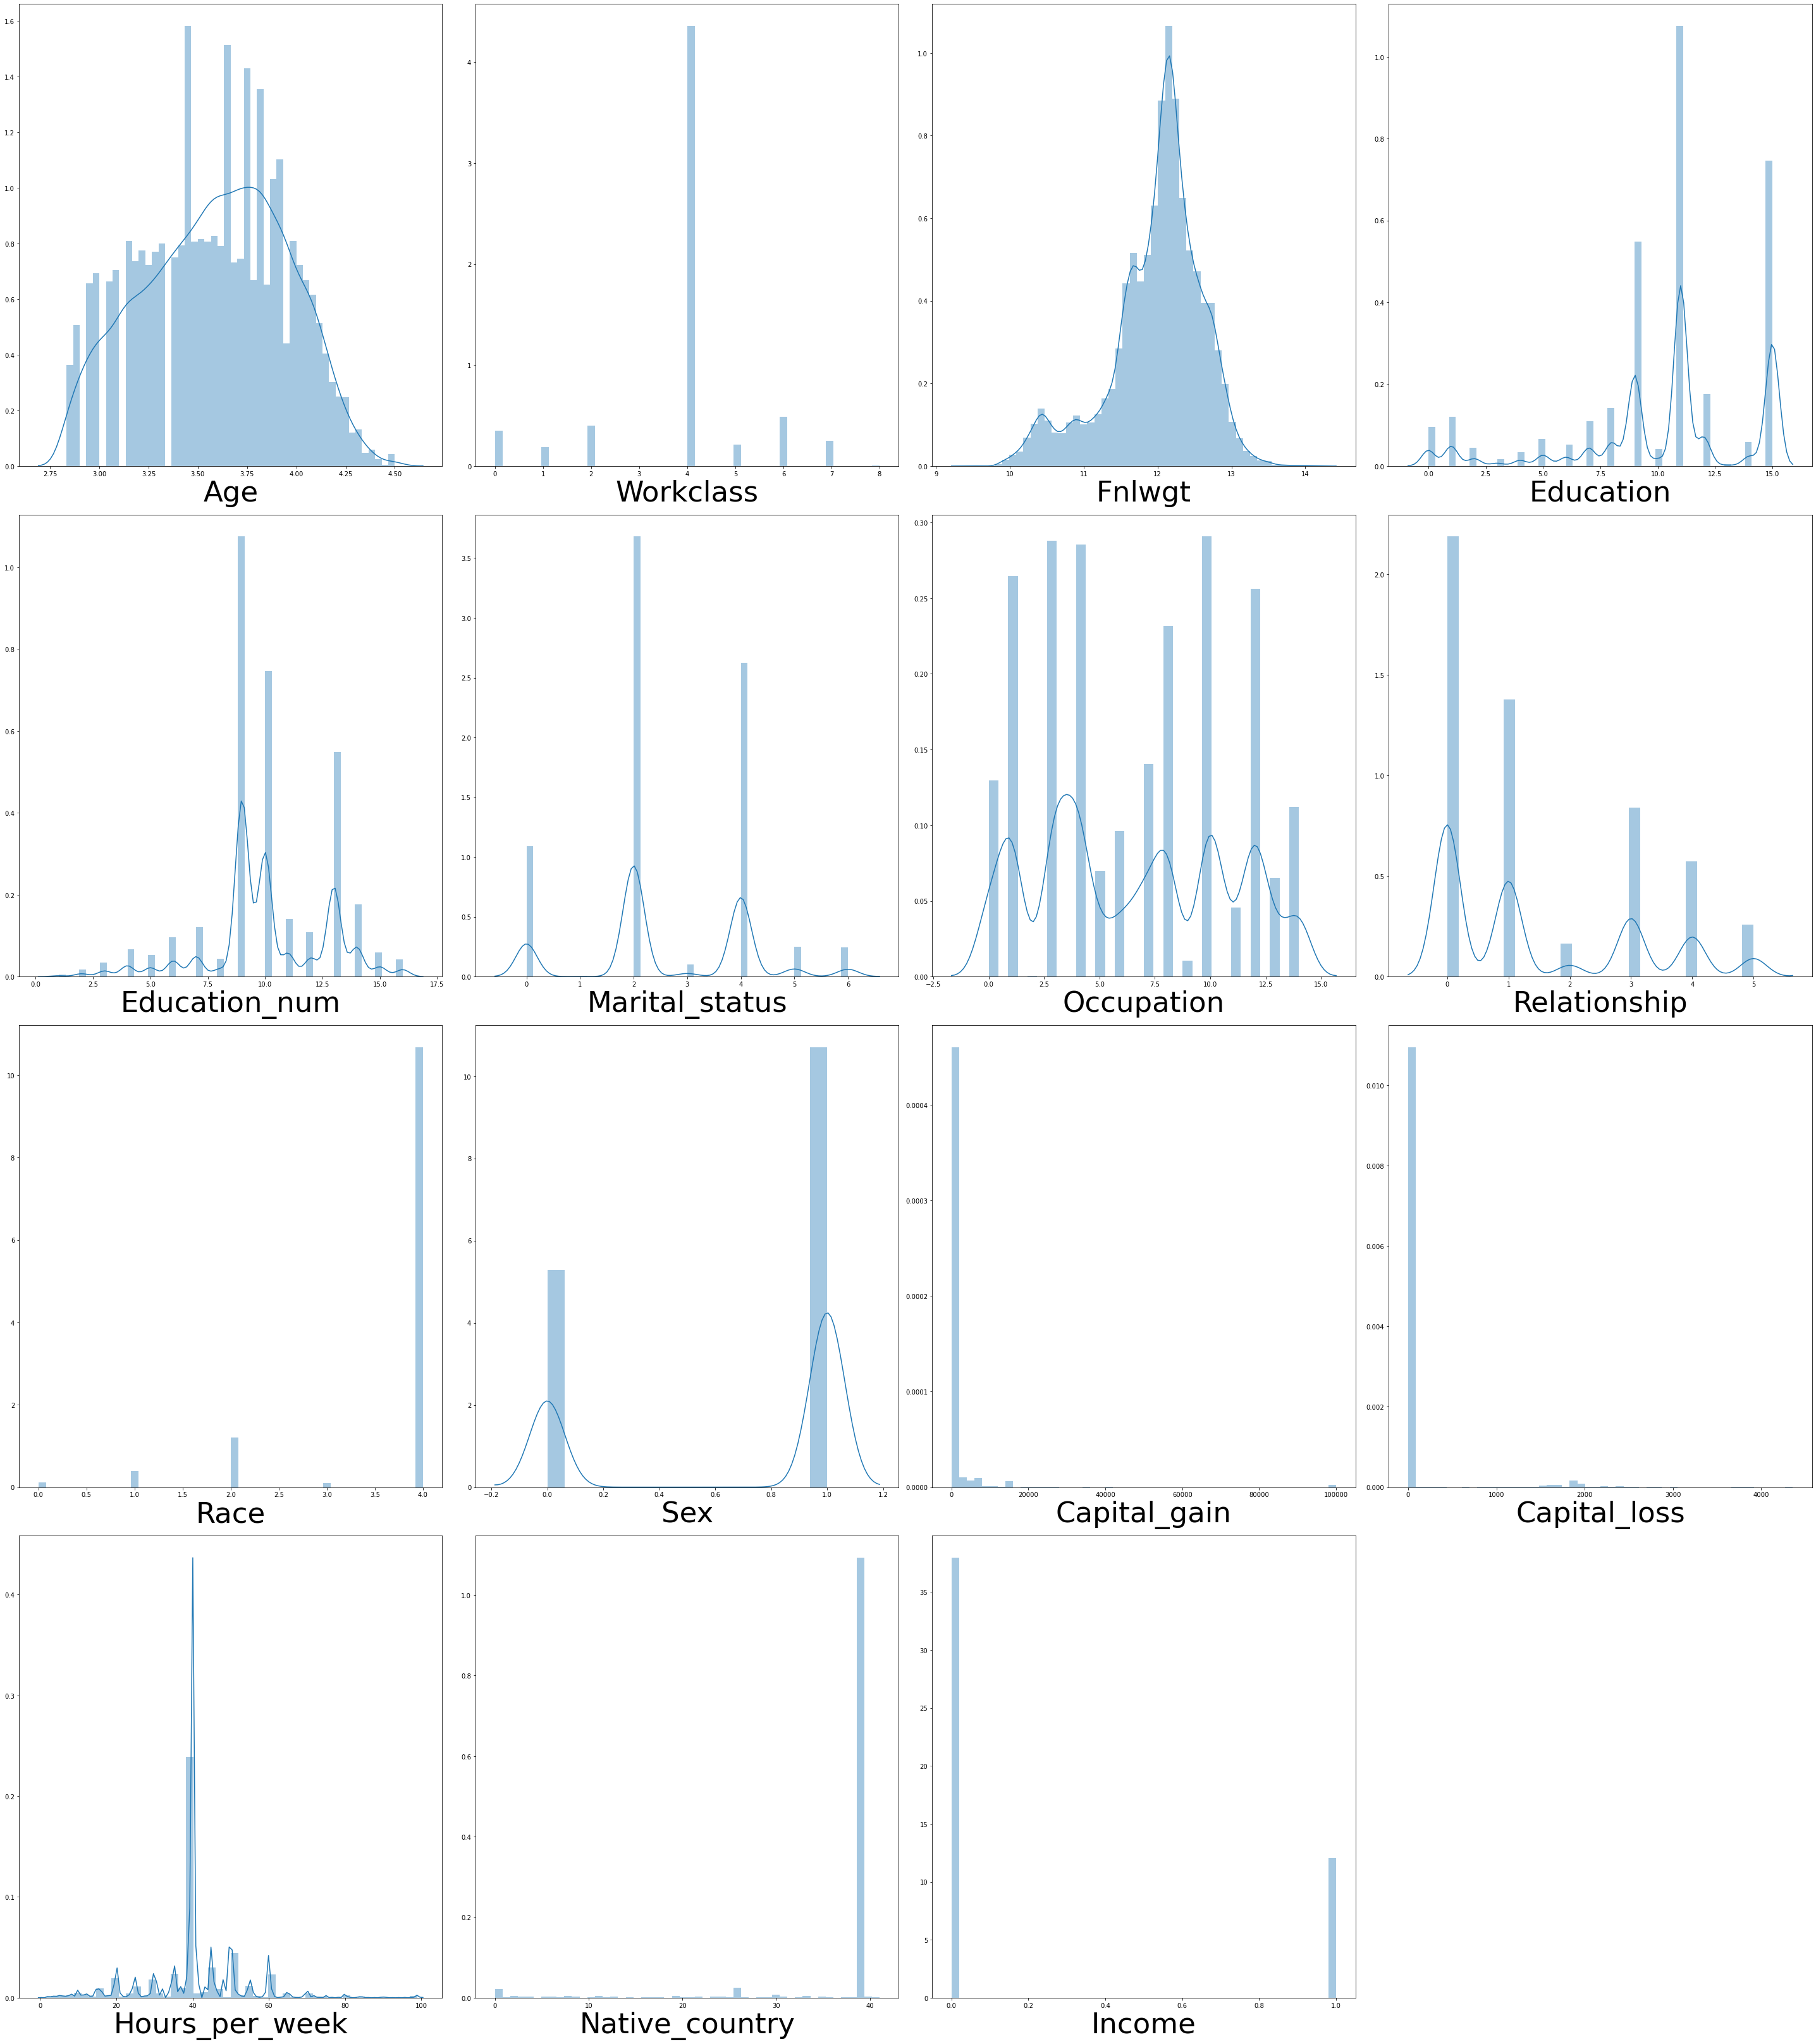

In [27]:
plt.figure(figsize=(40,45))
plotnumber=1
for column in data:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=45)
        plt.xlabel(column,fontsize=45)
    plotnumber+=1
plt.tight_layout()

In [28]:
corr=data.corr()
corr.shape



(15, 15)

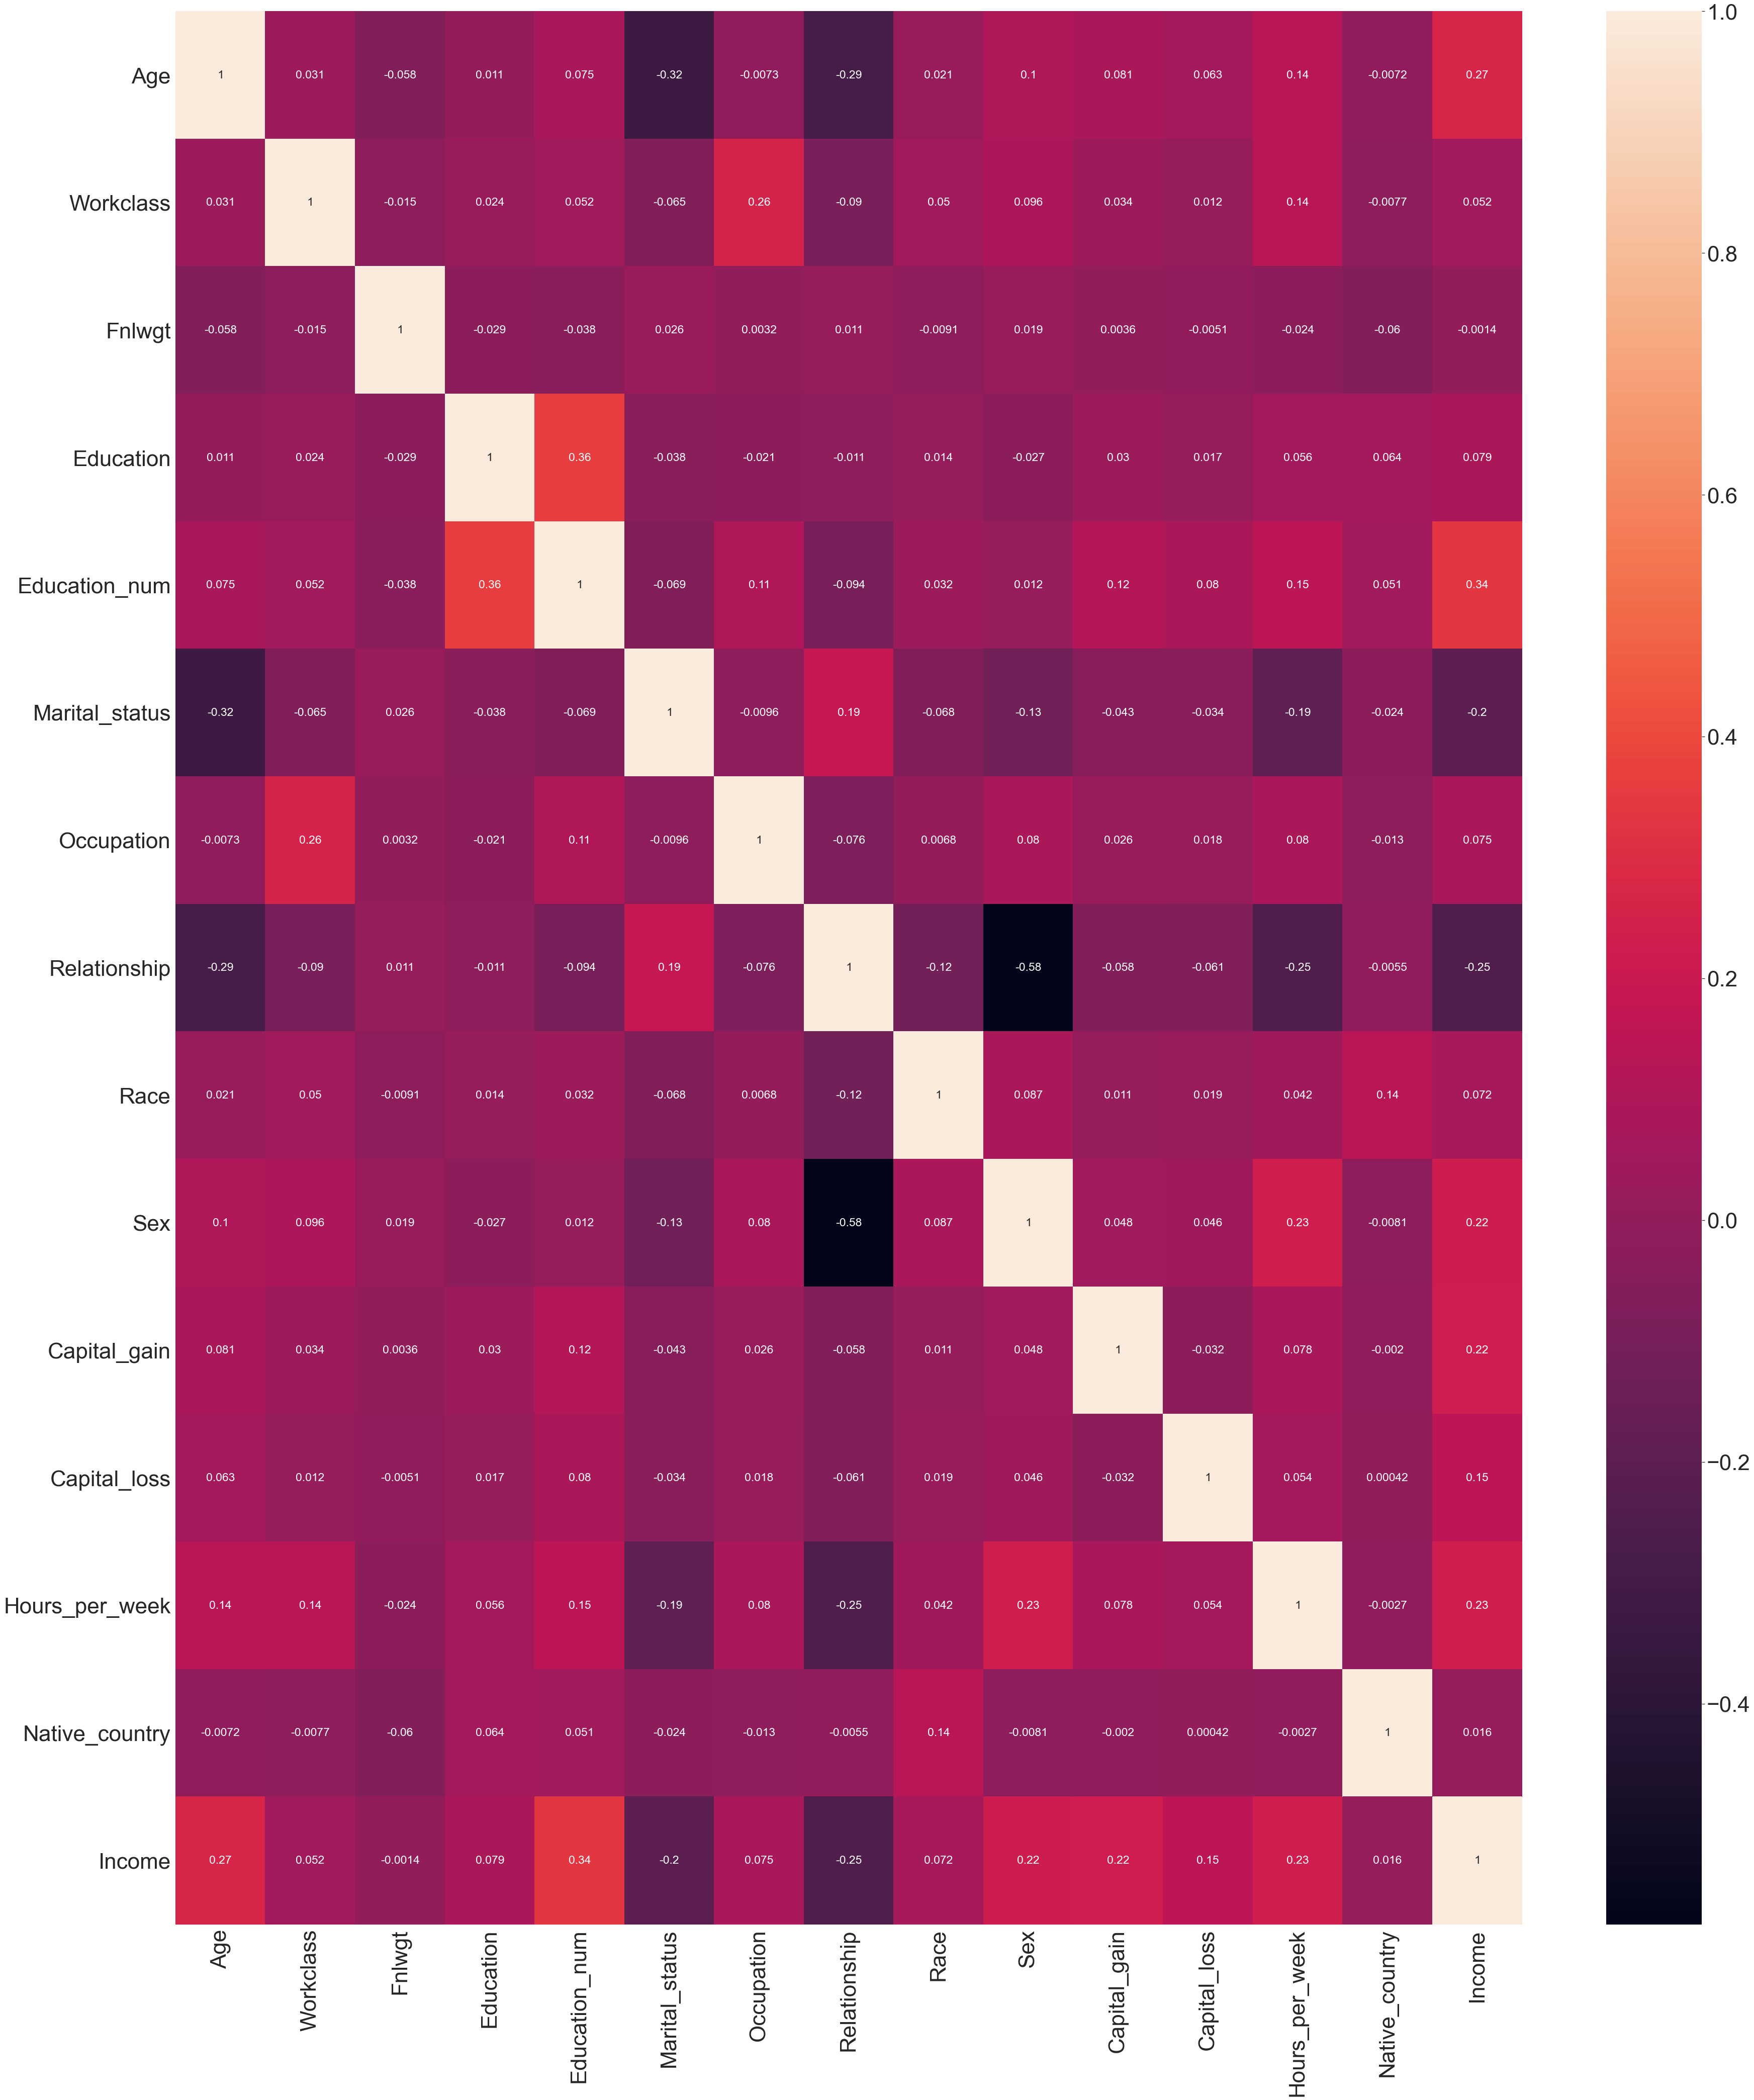

In [29]:
plt.figure(figsize=(60,70))
sns.set(font_scale=4)
sns.heatmap(corr,annot=True,annot_kws={'size':23}) 
plt.show()

In [30]:
# Their exists no correlaton between the provided data , hence we are good to go 


In [31]:
from sklearn.feature_selection import SelectKBest,f_classif 

In [32]:
best_features=SelectKBest(score_func=f_classif,k=11)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=["Column_names","Scores_obtained"]
print(feature_scores.nlargest(11,"Scores_obtained"))

      Column_names  Scores_obtained
4    Education_num      4120.741694
7     Relationship      2187.696334
0              Age      1886.677918
12  Hours_per_week      1813.339094
10    Capital_gain      1709.157677
9              Sex      1593.288816
5   Marital_status      1346.636300
11    Capital_loss       754.777449
3        Education       206.095569
6       Occupation       186.393133
8             Race       168.964252


In [33]:
fnl_data=data[["Education_num","Relationship","Age","Hours_per_week","Capital_gain","Sex","Marital_status","Capital_loss","Education",
          "Occupation","Race"]]

In [34]:
fnl_data.head()

,Education_num,Relationship,Age,Hours_per_week,Capital_gain,Sex,Marital_status,Capital_loss,Education,Occupation,Race
0,13,0,3.912023,13,0,1,2,0,9,4,4
1,9,1,3.637586,40,0,1,0,0,11,6,4
2,7,0,3.970292,40,0,1,2,0,1,6,2
3,13,5,3.332205,40,0,0,2,0,9,10,2
4,14,5,3.610918,40,0,0,2,0,12,4,4


In [35]:
x=fnl_data
y=data.Income

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=43)  

In [37]:
import six
import joblib
import sys
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.externals.joblib']=joblib
from collections import Counter

from imblearn.over_sampling import SMOTE

In [38]:
sm=SMOTE()
samp=SMOTE(0.75)
x_trains,y_trains=samp.fit_resample(x_train,y_train)
print("Before transformation",format(Counter(y_train)))
print("After Transformation",format(Counter(y_trains)))

Before transformation Counter({0: 18530, 1: 5890})
After Transformation Counter({0: 18530, 1: 13897})


In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
from time import time
start=time()
knn.fit(x_trains,y_trains)
print("Training Time:",time()-start)

start=time()
y_pred=knn.predict(x_test)
print("Testing Time:",time()-start)

Training Time: 1.0471532344818115
Testing Time: 5.812354326248169


In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      6189
           1       0.62      0.75      0.68      1951

    accuracy                           0.83      8140
   macro avg       0.77      0.80      0.78      8140
weighted avg       0.84      0.83      0.83      8140



In [41]:
confusion_matrix(y_test,y_pred)

array([[5277,  912],
       [ 485, 1466]], dtype=int64)

In [42]:
from sklearn.model_selection import cross_val_score 
cross_val_score(knn,x,y,cv=6).mean()

0.8490480537930045

In [43]:
#Hence the model is not oerfitting , lets to tuning now

In [200]:
from sklearn.model_selection import GridSearchCV
param_grid={"algorithm" : ["kd_tree","brute"],
           "leaf_size" : range(4,8),
           "n_neighbors" : [3,4,5,6,7]}

grdsrch=GridSearchCV(estimator=knn,param_grid=param_grid)
grdsrch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': range(4, 8),
                         'n_neighbors': [3, 4, 5, 6, 7]})

In [201]:
grdsrch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 5, 'n_neighbors': 6}

In [203]:
knn=KNeighborsClassifier(algorithm= 'kd_tree', leaf_size= 5, n_neighbors= 6)
start=time()
knn.fit(x_trains,y_trains)
print("Training Time:",time()-start)

Training Time: 0.8206686973571777


In [204]:
start=time()
y_pred=knn.predict(x_test)
print("Testing Time:",time()-start) 

Testing Time: 12.97096061706543


In [205]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6189
           1       0.74      0.56      0.64      1951

    accuracy                           0.85      8140
   macro avg       0.81      0.75      0.77      8140
weighted avg       0.84      0.85      0.84      8140



In [206]:
# Lets check on other algorithms as well 

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt=DecisionTreeClassifier()


start=time()
dt.fit(x_trains,y_trains)
print("Training Time:",time()-start) 

start=time()
y_pred=dt.predict(x_test)
print("Training Time:",time()-start) 

Training Time: 0.5379512310028076
Training Time: 0.015636444091796875


In [46]:
confusion_matrix(y_test,y_pred)

array([[5464,  725],
       [ 776, 1175]], dtype=int64)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6189
           1       0.62      0.60      0.61      1951

    accuracy                           0.82      8140
   macro avg       0.75      0.74      0.74      8140
weighted avg       0.81      0.82      0.81      8140



In [48]:
cross_val_score(dt,x,y,cv=10).mean()

0.8178439803439803

In [93]:
#Indicating no overfitting or underfitting is taking place

In [53]:
param_grid={"criterion": ["gini","entropy"],  
           "max_depth": range(6,11),
           "min_samples_leaf": range(2,5),
           "min_samples_split": range(3,6)}

grdsrch=GridSearchCV(estimator=dt,param_grid=param_grid)
grdsrch.fit(x_trains,y_trains)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(6, 11),
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(3, 6)})

In [54]:
grdsrch.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [55]:
dt=DecisionTreeClassifier(criterion='gini',
 max_depth= 10,
 min_samples_leaf=2,
 min_samples_split=5)

start=time()
dt.fit(x_trains,y_trains)
print("Training Time:",time()-start)

start=time()
y_pred=dt.predict(x_test)
print("Testing Time:",time()-start)

Training Time: 0.2560248374938965
Testing Time: 0.016017675399780273


In [56]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      6741
           1       0.55      0.77      0.64      1399

    accuracy                           0.85      8140
   macro avg       0.75      0.82      0.78      8140
weighted avg       0.88      0.85      0.86      8140



In [59]:
#Accuracy increased by 3% ,lets check other algorithms too 

In [58]:
confusion_matrix(y_test,y_pred)

array([[5869,  320],
       [ 872, 1079]], dtype=int64)

In [60]:
from sklearn.ensemble import AdaBoostClassifier

In [63]:
ad=AdaBoostClassifier()

ad.fit(x_trains,y_trains)
y_pred=ad.predict(x_test)

confusion_matrix(y_test,y_pred)

array([[5236,  953],
       [ 398, 1553]], dtype=int64)

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      6189
           1       0.62      0.80      0.70      1951

    accuracy                           0.83      8140
   macro avg       0.77      0.82      0.79      8140
weighted avg       0.86      0.83      0.84      8140



In [72]:
from sklearn.ensemble import BaggingClassifier
bag_cls=BaggingClassifier(ad,n_estimators=6,max_samples=0.6,bootstrap=True,random_state=4,oob_score=True)

In [73]:
bag_cls.fit(x_trains,y_trains)

BaggingClassifier(base_estimator=AdaBoostClassifier(), max_samples=0.6,
                  n_estimators=6, oob_score=True, random_state=4)

In [74]:
print("Before",ad.score(x_test,y_test))
print("After",bag_cls.score(x_test,y_test))

Before 0.8340294840294841
After 0.8377149877149878


In [76]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()

gbdt.fit(x_trains,y_trains)

y_pred=gbdt.predict(x_test)

In [77]:
confusion_matrix(y_test,y_pred)

array([[5335,  854],
       [ 390, 1561]], dtype=int64)

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90      6189
           1       0.65      0.80      0.72      1951

    accuracy                           0.85      8140
   macro avg       0.79      0.83      0.81      8140
weighted avg       0.86      0.85      0.85      8140



In [79]:
cross_val_score(gbdt,x,y,cv=8).mean()

0.8650798525798526

In [80]:
# Lets do tuning now by Randomised search CV 

In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [83]:
params={'n_estimators':[10,12,14,15,18],
       'learning_rate':[0.20,0.25,0.30,0.35]}

rndsrch=RandomizedSearchCV(gbdt,cv=4,param_distributions=params)

rndsrch.fit(x_trains,y_trains)

RandomizedSearchCV(cv=4, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.2, 0.25, 0.3, 0.35],
                                        'n_estimators': [10, 12, 14, 15, 18]})

In [85]:
rndsrch.best_params_

{'n_estimators': 18, 'learning_rate': 0.35}

In [86]:
gbdt=GradientBoostingClassifier(n_estimators=18, learning_rate=0.35)

In [87]:
gbdt.fit(x_trains,y_trains)

GradientBoostingClassifier(learning_rate=0.35, n_estimators=18)

In [89]:
y_pred=gbdt.predict(x_test)

In [90]:
confusion_matrix(y_test,y_pred)

array([[5263,  926],
       [ 380, 1571]], dtype=int64)

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      6189
           1       0.63      0.81      0.71      1951

    accuracy                           0.84      8140
   macro avg       0.78      0.83      0.80      8140
weighted avg       0.86      0.84      0.85      8140



In [92]:
#having tried on many models , the best accuracy is acchieved in Desition tree., lets proceed and save it .

In [95]:
import pickle 

final_model="income.pickle"
pickle.dump(dt,open(final_model,'wb'))